Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

Answer:-

In machine learning algorithms, kernel functions and polynomial functions are related in the context of feature transformation, particularly when using the kernel trick.

1.Kernel Functions:

i.Kernel functions are used in various machine learning algorithms, including Support Vector Machines (SVMs), to implicitly map data points into a higher-dimensional space without explicitly calculating the mapped feature vectors.

ii.Kernel functions compute the dot product (inner product) between these implicitly mapped feature vectors in the higher-dimensional space.

Common kernel functions include:

i.Linear Kernel: Computes the dot product in the original feature space, essentially performing no transformation.

ii.Polynomial Kernel: Computes the dot product after applying a polynomial function to the original feature vectors. The degree of the polynomial is a parameter that can be adjusted.

iii.Radial Basis Function (RBF) Kernel: Computes the dot product after applying a Gaussian-like function to the original feature vectors, which results in a non-linear transformation.

2.Polynomial Functions:

i.Polynomial functions are a type of mathematical function that involve raising a variable to a power, such as x^2, x^3, etc.

ii.In the context of kernel functions, the polynomial kernel is a specific type of kernel function that uses polynomial functions to perform the feature transformation.

The polynomial kernel can be defined as:

K(x, y) = (α * (x * y) + c)^d

Where K(x, y) is the kernel function value between data points x and y.

α is a scaling factor.

c is an offset.

d is the degree of the polynomial.

Relationship:

The relationship between polynomial functions and kernel functions lies in the use of polynomial functions within the polynomial kernel. The polynomial kernel employs polynomial functions to transform the original feature vectors implicitly into a higher-dimensional space, making it non-linear. The degree of the polynomial, d, determines the complexity of the transformation. When d is 1, it corresponds to a linear kernel, meaning no polynomial transformation is applied, and the original feature space is used.

In summary, polynomial functions are an integral part of the polynomial kernel, which is a type of kernel function used in SVMs and other machine learning algorithms. The kernel function leverages polynomial transformations to enable non-linear decision boundaries in the higher-dimensional space, allowing these algorithms to capture complex relationships in the data. The choice of the polynomial degree, as well as other kernel parameters, affects the model's ability to fit the data and its generalization performance.



Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Answer:-

Accuracy: 0.73


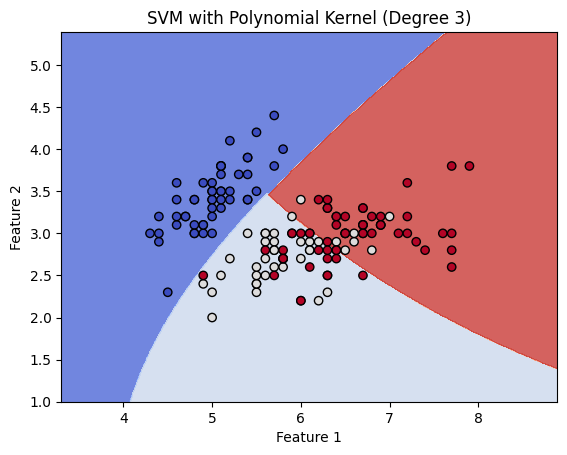

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm_classifier = SVC(kernel='poly')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel (Degree 3)')
plt.show()


Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

Answer:-

When you increase the value of epsilon (ε) in Support Vector Regression (SVR), it has a direct impact on the number of support vectors. Here’s what happens:

1.Wider Margin: A higher ε means that the ε-insensitive tube around your predicted values gets wider. Think of it like expanding a boundary that allows for some error in predictions.

2.Fewer Support Vectors: Because the tube is wider, more data points can fall within this margin without being considered support vectors. As a result, you end up with fewer points that are classified as support vectors.

3.Simpler Model: With fewer support vectors, your model becomes simpler. This can be beneficial because a simpler model might be easier to interpret and can generalize better to new data.

4.More Error Tolerance: Increasing ε means your model is more forgiving of small errors. It allows for larger differences between predicted and actual values without penalizing them, which can be helpful in datasets with noise or outliers.

5.Finding the Balance: However, there's a trade-off. While a larger ε simplifies the model, it might also lead to underfitting, meaning the model doesn’t capture the underlying patterns in the training data as well as it could.

In Summary

Increasing epsilon in SVR leads to a wider margin and fewer support vectors. This results in a simpler model that can handle noise better but may risk missing important patterns in the data if ε is set too high. It’s all about finding the right balance for your specific dataset!

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

Answer:-

Support Vector Regression (SVR) is a powerful regression technique that relies on several hyperparameters to control its performance and flexibility. The choice of kernel function, C parameter, epsilon (ε) parameter, and gamma (γ) parameter can significantly impact the performance of an SVR model. Let's discuss each parameter and how it affects SVR:

Key Parameters in Support Vector Regression (SVR)

1.Kernel Function

What It Is: The kernel function helps transform your input data into a higher-dimensional space, making it easier to find patterns.

Types:

i.Linear Kernel: Good for data that can be separated with a straight line. Use this when your data has a linear relationship.

ii.Polynomial Kernel: Useful for data with a polynomial relationship. You can increase the degree of the polynomial for more complexity.

iii.RBF (Radial Basis Function) Kernel: Great for capturing complex, non-linear relationships. This is a popular choice for many datasets.

When to Adjust: If your data is linear, stick with the linear kernel. For more complex relationships, try the RBF kernel.

2.C Parameter


What It Is: The C parameter controls how much you want to avoid misclassifying training points. It balances fitting the training data and keeping the model simple.

Effects:

i.High C Value: The model tries hard to minimize errors, which can lead to overfitting (fitting noise in the data).

ii.Low C Value: The model is more forgiving of errors, which can lead to underfitting (not capturing important patterns).

When to Adjust: Increase C if your model is too simple and not capturing the data well. Decrease C if it’s too complex and fitting noise.

3.Epsilon (ε) Parameter

What It Is: Epsilon defines a margin around your predicted values. Points within this margin don’t count as errors.

Effects:

i.High Epsilon Value: Creates a wider margin, allowing more points to be considered “correct.” This simplifies the model and can reduce sensitivity to noise.
ii.Low Epsilon Value: Makes the margin narrower, so the model pays more attention to small errors, which can lead to more support vectors.

When to Adjust: Increase ε if your data has a lot of noise, so the model can be more tolerant of small errors. Decrease ε if you want the model to be more precise and capture more details.

4.Gamma (γ) Parameter

What It Is: Gamma determines how far the influence of a single training example reaches.

Effects:

i.High Gamma Value: The model focuses on individual points, which can lead to overfitting (too complex).

ii.Low Gamma Value: The model takes a broader view, which can lead to underfitting (too simple).

When to Adjust: Increase gamma if the model is too simple and not capturing the complexity of the data. Decrease gamma if it’s too complex and fitting noise.

Summary

1.Kernel Function: Choose based on the relationship in your data (linear vs. non-linear).

2.C Parameter: Adjust to balance model complexity (high for complex models, low for simpler ones).

3.Epsilon (ε): Set to manage how much error you’re willing to tolerate (higher for noise tolerance, lower for detail capture).

4.Gamma (γ): Tune to balance between fitting the data closely (high) and generalizing well (low).

By understanding and adjusting these parameters, you can improve the performance of your SVR model, making it more effective for your specific dataset!

Q5. Assignment:

Import the necessary libraries and load the dataseg

Split the dataset into training and testing setZ

Preprocess the data using any technique of your choice (e.g. scaling, normalizationK

Create an instance of the SVC classifier and train it on the training datW

Use the trained classifier to predict the labels of the testing datW

Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,precision, recall, F1-score)

Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV toimprove its performanc_

Train the tuned classifier on the entire dataseg

Save the trained classifier to a file for future use.

Answer:-

Using dataset for cancer classification

Dataset Source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Attribute Information:

1.ID number
2.Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1.radius (mean of distances from center to points on the perimeter)

2.texture (standard deviation of gray-scale values)

3.perimeter

4.area

5.smoothness (local variation in radius lengths)

6.compactness (perimeter^2 / area - 1.0)

7.concavity (severity of concave portions of the contour)

8.concave points (number of concave portions of the contour)

9.symmetry

10.fractal dimension ("coastline approximatiom")

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



In [4]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape


(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
## Dropping id and Unnamed: 32 column as statistically insignificant
df = df.drop(labels=['id','Unnamed: 32'],axis=1)
df.shape


(569, 31)

In [8]:
diagnosis_map = {'B':0,'M':1}
df['diagnosis'] = df['diagnosis'].replace(diagnosis_map)
df.head()

<ipython-input-8-252e0a1c6c05>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace(diagnosis_map)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


<Axes: xlabel='diagnosis'>

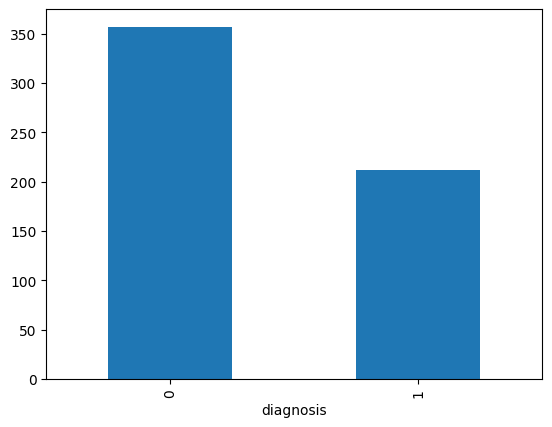

In [10]:
df.diagnosis.value_counts().plot(kind='bar')

In [11]:
## Seperate dependent and independent variable
X = df.drop(labels=['diagnosis'],axis=1)
Y = df[['diagnosis']]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=42, stratify=Y)

In [13]:
xtrain.shape

(398, 30)

In [14]:
xtest.shape

(171, 30)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [16]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.705820,1.049745,2.121295,1.669337,2.276458,4.544295,3.539139,2.848393,4.032390,2.639773,...,1.459510,0.949589,1.868176,1.306840,1.335383,2.313855,2.346427,2.049399,3.944281,0.866554
1,0.536388,-0.909945,0.569095,0.390316,-0.065868,0.644945,0.393543,0.557002,-0.116781,-0.401530,...,0.508294,-0.645315,0.501917,0.330087,0.477013,1.242091,1.052574,1.255850,0.167978,0.405242
2,-0.131456,-0.993336,-0.148848,-0.211543,-0.916169,-0.508574,-0.567530,-0.606645,-0.079867,-0.512454,...,-0.362451,-1.028485,-0.280415,-0.399387,-0.196219,0.368661,-0.080795,-0.140014,0.741988,0.687521
3,0.928077,1.418055,0.925405,0.828546,0.329734,0.223748,0.983188,0.443947,-1.866520,-0.555982,...,0.365921,0.351910,0.386082,0.243539,-0.330866,-0.464721,0.030311,-0.072253,-2.040715,-0.861167
4,0.144699,-0.972488,0.158315,-0.009697,1.205760,0.585041,0.137701,0.562858,1.116158,0.117991,...,0.008957,-1.257732,0.059367,-0.140450,-0.187804,0.359126,-0.064176,0.376471,0.373873,0.047726


In [17]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.113702,-0.022757,0.096063,0.012384,-0.832738,-0.461400,-0.004036,-0.491044,-1.257434,-0.724475,...,0.000703,0.404309,0.020756,-0.092937,-0.978852,0.079425,0.493724,-0.282461,-0.686799,-0.506946
1,-0.582321,-0.124679,-0.624337,-0.594570,-0.834128,-0.836920,-0.999032,-1.019701,-0.954736,-0.300434,...,-0.548155,0.186524,-0.619604,-0.566124,-0.137312,-0.745058,-1.086629,-0.960215,-0.048836,-0.166454
2,-1.794022,1.181780,-1.801388,-1.342789,-3.005421,-1.104989,-1.091673,-1.235829,-0.836610,-0.530708,...,-1.411472,0.728530,-1.432825,-1.085410,-1.775790,-1.194868,-1.300578,-1.727112,-0.062875,-0.739798
3,-0.869748,-0.604178,-0.859420,-0.798682,0.823368,-0.460651,-0.715928,-0.604353,-0.367798,0.109566,...,-0.801951,0.085001,-0.815929,-0.727209,0.199304,-0.662419,-0.793957,-0.608162,0.135222,-0.277388
4,-0.387886,-0.634291,-0.384750,-0.457270,1.157092,0.169460,-0.613048,-0.473220,1.130923,0.506930,...,-0.381022,-0.684614,-0.409022,-0.457498,0.645321,-0.346484,-0.624925,-0.515707,0.249088,0.093857


In [18]:
## Saving the scaler to pickle file to save for future use
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,file=f)

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain.values.flatten())


SVC(kernel='linear')

Use trained classifier to predict labels on testing data


In [20]:
ypred_test = svc.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

Evaluate model performance on base model

<Axes: >

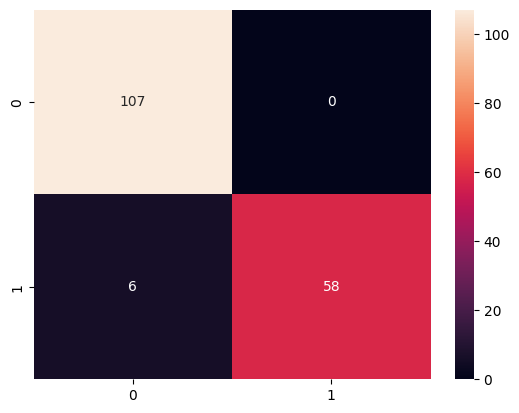

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



Hyperparameter tuning with GridSearchCV


In [23]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [25]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVC(),param_grid=parameters,refit=True,scoring='f1',cv=5,verbose=3)

In [26]:
gscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='f1', verbose=3)

In [27]:
gscv.best_params_


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
gscv.best_score_

0.9536566071398516

In [29]:
best_svc = gscv.best_estimator_
best_svc

SVC(C=0.1, gamma=1, kernel='linear')

<Axes: >

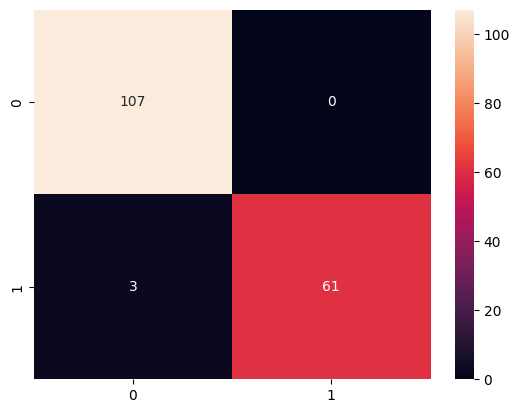

In [30]:
# Evaluating best estimator
ypred_test = best_svc.predict(xtest)
cf_best = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf_best,annot=True,fmt='d')

In [31]:
# Classification report for tuned model
print('Classification report for tuned model :\n')
print(classification_report(ytest,ypred_test))

Classification report for tuned model :

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Model Test F1 score imporved from 0.96 to 0.98 on test data


Training the best estimator on entire dataset


In [32]:
gscv.best_params_


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [33]:
final_svc = SVC(kernel='linear',C=0.1,gamma=1)
final_svc.fit(X,Y.values.flatten())

SVC(C=0.1, gamma=1, kernel='linear')

Save the trained classifier file for future use


In [35]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(final_svc,file=f)

Pickle file links

1.model.pkl:- /content/model.pkl

2.scaler.pkl:- /content/scaler.pkl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')